# **Parcial 1 ML**

# **Importo librerias**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Clone github
!git clone https://github.com/omarcastano/JaverianaML.git

fatal: destination path 'JaverianaML' already exists and is not an empty directory.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from JaverianaML import plots_util as pu
from JaverianaML import preprocessing_util
from JaverianaML import preprocessing_util as preu
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [8]:
#na_values=['0']
dataset = pd.read_csv('/content/corpus.csv')
dataset.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
dataset.columns = ['Customer', 'State','Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']

In [10]:
cols = ['Customer', 'State','Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']

In [11]:
shape = dataset.shape
shape

(9134, 24)

# **Tipos de los datos**

In [12]:
dataset. dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

# **Elimino datos atipicos**

In [13]:
list_continua=['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies']
for var in list_continua:
  q1 = dataset[var].quantile(0.25)
  q3 = dataset[var].quantile(0.75)
  IQR = q3 - q1
  outliers_q1 = dataset.index[dataset[var] < q1 - 1.5*IQR]
  dataset.drop(labels=outliers_q1, inplace=True)
  outliers_q3 = dataset.index[dataset[var] > q3 + 1.5*IQR]
  dataset.drop(labels=outliers_q3, inplace=True)

# **Encoder datos categoricos**

In [14]:
labelencoder= LabelEncoder()
dataset['Customer']=labelencoder.fit_transform(dataset['Customer'])
dataset['State']=labelencoder.fit_transform(dataset['State'])
dataset['Response']=labelencoder.fit_transform(dataset['Response'])
dataset['Coverage']=labelencoder.fit_transform(dataset['Coverage'])
dataset['Education']=labelencoder.fit_transform(dataset['Education'])
dataset['Effective To Date']=labelencoder.fit_transform(dataset['Effective To Date'])
dataset['EmploymentStatus']=labelencoder.fit_transform(dataset['EmploymentStatus'])
dataset['Gender']=labelencoder.fit_transform(dataset['Gender'])
dataset['Marital Status']=labelencoder.fit_transform(dataset['Marital Status'])
dataset['Policy Type']=labelencoder.fit_transform(dataset['Policy Type'])
dataset['Policy']=labelencoder.fit_transform(dataset['Policy'])
dataset['Renew Offer Type']=labelencoder.fit_transform(dataset['Renew Offer Type'])
dataset['Sales Channel']=labelencoder.fit_transform(dataset['Sales Channel'])
dataset['Vehicle Class']=labelencoder.fit_transform(dataset['Vehicle Class'])
dataset['Vehicle Size']=labelencoder.fit_transform(dataset['Vehicle Size'])
dataset['Location Code']=labelencoder.fit_transform(dataset['Location Code'])

Customer Lifetime Value


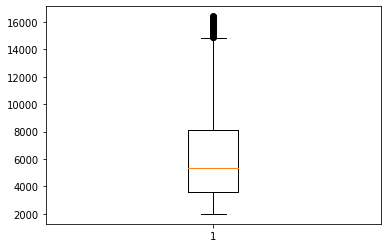

Income


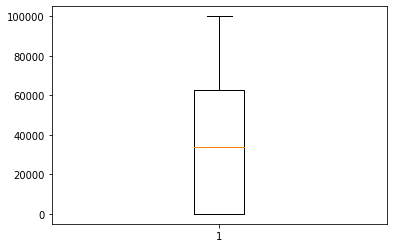

Monthly Premium Auto


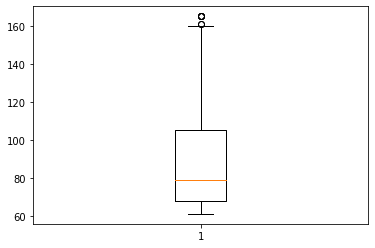

Months Since Last Claim


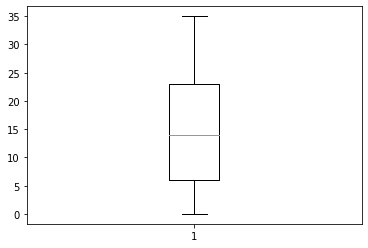

Months Since Policy Inception


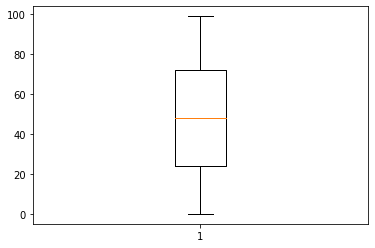

Number of Open Complaints


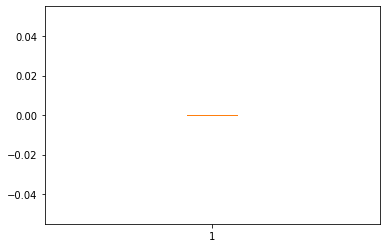

Number of Policies


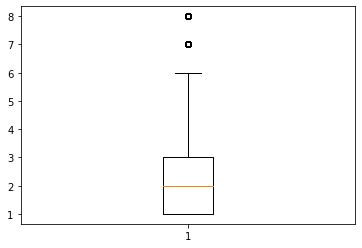

In [15]:
for i in list_continua:
  print(i)
  plt.boxplot(dataset[i])
  plt.show()

# **Normalizacion de la base de datos**

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
newData = scaler.fit_transform(dataset.drop(['Response'], 1))
print(newData)

[[0.06471367 1.         0.05333728 ... 0.20760426 1.         0.5       ]
 [0.6469712  0.         0.34585438 ... 0.610525   0.         0.5       ]
 [0.01042701 0.5        0.755758   ... 0.305635   1.         0.5       ]
 ...
 [0.58540218 0.25       0.07644104 ... 0.20457628 0.         0.5       ]
 [0.79046673 0.25       0.38366127 ... 0.3729425  0.         0.        ]
 [0.92552135 0.25       0.0428132  ... 0.19939578 1.         0.5       ]]


<ipython-input-16-756187989e9d>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  newData = scaler.fit_transform(dataset.drop(['Response'], 1))


In [17]:
X = np.array(newData)
y = np.array(dataset['Response'])

In [18]:
print('X:',X)
print('y:',y)

X: [[0.06471367 1.         0.05333728 ... 0.20760426 1.         0.5       ]
 [0.6469712  0.         0.34585438 ... 0.610525   0.         0.5       ]
 [0.01042701 0.5        0.755758   ... 0.305635   1.         0.5       ]
 ...
 [0.58540218 0.25       0.07644104 ... 0.20457628 0.         0.5       ]
 [0.79046673 0.25       0.38366127 ... 0.3729425  0.         0.        ]
 [0.92552135 0.25       0.0428132  ... 0.19939578 1.         0.5       ]]
y: [0 0 0 ... 1 0 0]


In [19]:
print(dataset['Response'].value_counts()) 

0    5161
1     882
Name: Response, dtype: int64


In [20]:
validation_size = 0.30
seed = 10
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

# **Balance de la base de datos**

se balancea la base de datos ya que. 
hay mas cantidad de 0's que de 1's 

In [21]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
nm = NearMiss()
dataRus, targetRus = rus.fit_resample(X, y)
print(len(dataRus))
print(len(targetRus))
validation_size = 0.30
seed = 10
X_train2, X_validation2, Y_train2, Y_validation2 = train_test_split(dataRus, targetRus, test_size=validation_size, random_state=seed)


1764
1764


In [22]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# **Regresion  Lineal**

In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
regr = linear_model.LinearRegression()

In [25]:
regr.fit(X_train2, Y_train2)

LinearRegression()

In [26]:
y_pred = regr.predict(X_train2)

In [27]:
Y_train.shape

(4230,)

In [28]:
y_pred.shape

(1234,)

In [29]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
#print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
#print("Mean squared error:", mean_squared_error(Y_train, y_pred))
#men=mean_squared_error(Y_train, y_pred)
#print(men)
# Puntaje de Varianza. El mejor puntaje es un 1.0
#print('Variance score: %.2f' % r2_score(Y_train2, y_pred))

Coefficients: 
 [ 9.45245404e-02 -3.86657253e-02 -1.33851489e-01 -7.00352455e-02
  1.63689093e-02 -2.73541109e-02 -1.87788656e-01  1.61665759e-02
  1.54614516e-01 -1.74794889e-01 -1.53185217e-01 -6.29905665e-02
 -5.70432088e-02 -9.82094397e-02  8.32667268e-17 -9.64310303e-02
  1.14764070e-01 -5.01932216e-02 -5.62991091e-01 -4.84419324e-02
  6.40219966e-01  3.39675876e-03 -1.49624535e-01]


# **Regresion Logistica**

In [30]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    return clf

In [31]:
model = run_model_balanced(X_train2, X_validation2, Y_train2, Y_validation2)

In [32]:
predictions = model.predict(X_validation2)
print(f1_score(Y_validation2, predictions))
print(classification_report(Y_validation2, predictions))

0.6407079646017699
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       256
           1       0.62      0.66      0.64       274

    accuracy                           0.62       530
   macro avg       0.62      0.62      0.62       530
weighted avg       0.62      0.62      0.62       530



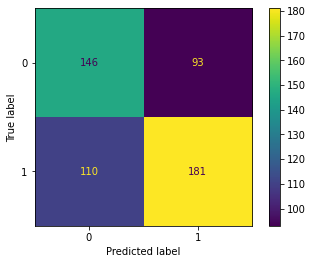

In [33]:
cm = metrics.confusion_matrix(predictions,Y_validation2)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# **KNN k=5**

In [34]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train2, Y_train2)

KNeighborsClassifier()

In [35]:
predict = knn.predict(X_validation2)

In [36]:
print(f1_score(Y_validation2, predict))
print(classification_report(Y_validation2, predict))

0.7848484848484849
              precision    recall  f1-score   support

           0       0.90      0.50      0.64       256
           1       0.67      0.95      0.78       274

    accuracy                           0.73       530
   macro avg       0.78      0.72      0.71       530
weighted avg       0.78      0.73      0.72       530



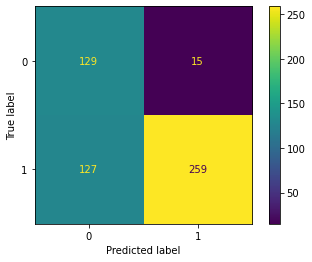

In [37]:
cm2 = metrics.confusion_matrix(predict,Y_validation2)
disp2 = ConfusionMatrixDisplay(cm2)
disp2.plot()

# **Discriminante Lineal**

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [39]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train2, Y_train2)

LinearDiscriminantAnalysis()

In [40]:
predict2 = clf.predict(X_validation2)

In [41]:
print(f1_score(Y_validation2, predict2))
print(classification_report(Y_validation2, predict2))

0.6443661971830986
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       256
           1       0.62      0.67      0.64       274

    accuracy                           0.62       530
   macro avg       0.62      0.62      0.62       530
weighted avg       0.62      0.62      0.62       530



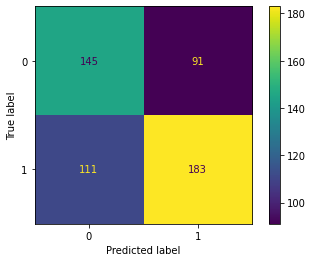

In [42]:
cm3 = metrics.confusion_matrix(predict2,Y_validation2)
disp3 = ConfusionMatrixDisplay(cm3)
disp3.plot()

# **Discriminante Cuadrático**

In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [44]:
model5 = QuadraticDiscriminantAnalysis()
model5.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [45]:
predict5 = clf.predict(X_validation2)

In [46]:
print(f1_score(Y_validation2, predict5))
print(classification_report(Y_validation2, predict5))

0.6443661971830986
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       256
           1       0.62      0.67      0.64       274

    accuracy                           0.62       530
   macro avg       0.62      0.62      0.62       530
weighted avg       0.62      0.62      0.62       530



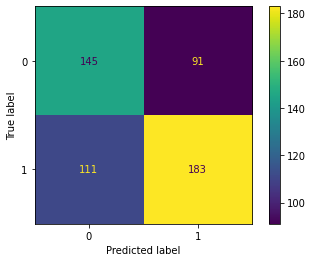

In [47]:
cm3 = metrics.confusion_matrix(predict5,Y_validation2)
disp3 = ConfusionMatrixDisplay(cm3)
disp3.plot()

# **Análisis de resultados**

**Preprocesamiento:**
Se decidio normalizar la base de datos y eliminar datos atipicos. Gracias a esto mismo, se logro una mejora en el F1-SCORE, que es en la métrica en la que nos estamos fijando.

Adicionalmente se decidio hacerle el encoder a los datos categoricos para que estos se puedan tener en cuenta en los modelos que se aplicaron.

**Ajuste de los datos:** Se dicidio normalizar los datos, como se nombró anteriormente, ademas se decidio balancear la base de datos ya que habia una mayor cantidad de 0's que de 1's y esto puede ocasionar que el modelo tenga un sesgo con respecto a los 0's

**Analisis de modelos**


1.   **Regresion Lineal:** La regresion no se ajusta a este tipo de datos, debido a su naturaleza. Necesitamos clasificar y no "interpolar" ya que la cateogria utilizada es ***response*** que son valores booleanos.
2.   **Regresion Logistica:** Ya que la naturaleza de este modelo es hacer calculos sobre valores entre 0 y 1 si se ajuste a esta base de datos y permite una prediccion que no es la mas acertada, ya que el modelo tiene una rigidez que no permite separar apropiadamente los datos. Se podría buscar unas mejora por medio de los hiperparámetros, pero no se visto en clase. sin embargo el modelo clasifica con una correctitud de mas del 50%.
3. **KNN K=5:** Este modelo es el mas apropiado, segun los temas visto en clase, ya que obtiene un mayor puntaje en **F1-SCORE**. Este mayor puntaje se logra debido a la naturaleza de este mismo, ya que calcula esto por medio de distancias y cateogrias. Segun esto se puede lograr una mejor clasificacion segun el atributo de ***response*** de la base de datos. De igual manera, se podria buscar una mejora en el puntaje con la ayuda de hiperparámetros pero no hemos visto en clase y por ende no esta permitido usarlos.
4. **Análisis de de discriminante Lineal:** En este modelo se obtiene resultados con caracteristicas similares de los de la regresion logistica. Según su **F1-SCORE** no es lo mejor decision usarlo, pero lograr cumplir la tarea de manera satisfactoria. es decir, tiene correctitud por encima del 50%.
5. **Análisis de de discriminante Cuadrático:** Este modelo se obtiene resultados muy similares al análisis discriminante lineal, ya que funcionan de una menera similar. La diferencia entre la forma de la frontera de decision no causa diferencia en los resultados. Según su **F1-SCORE** no es lo mejor decision usarlo, pero lograr cumplir la tarea de manera satisfactoria. es decir, tiene correctitud por encima del 50%.
